# Predicting House Sale Prices in Ames, IA using Linear Regression

![housing](housing.jpg)

## Introduction
This data set describes the sale of individual residential property in Ames, Iowa from 2006 to 2010


## Data Dictionary
The data set contains 2930 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values. [Here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) is a txt file. containing information on variables involved. 

### Resources
Data Docmentary can be found [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)
Data can also be downloaded from [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
For in detail information, click [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627)

## Goal
In this project, we'll build a Linear Regression model and exploring ways to improve it by 
- Determining what features of the total 79 available are that best can be used as a predictor estimate for house sale price hence creating the best model based on linear regression for making the best posible accurate predictions for house prices.
- Determining how good the predictor equation is as a fit through root mean square error.
---

Lets import the necessary tools and libraries

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge 
from sklearn.linear_model import LinearRegression

In [2]:
# Display Settings
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
data = pd.read_table('AmesHousing.tsv', delimiter="\t")

---

## Data Exploration

In [4]:
data.head(3)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [6]:
data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [7]:
data.describe()['SalePrice'].head()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
Name: SalePrice, dtype: float64

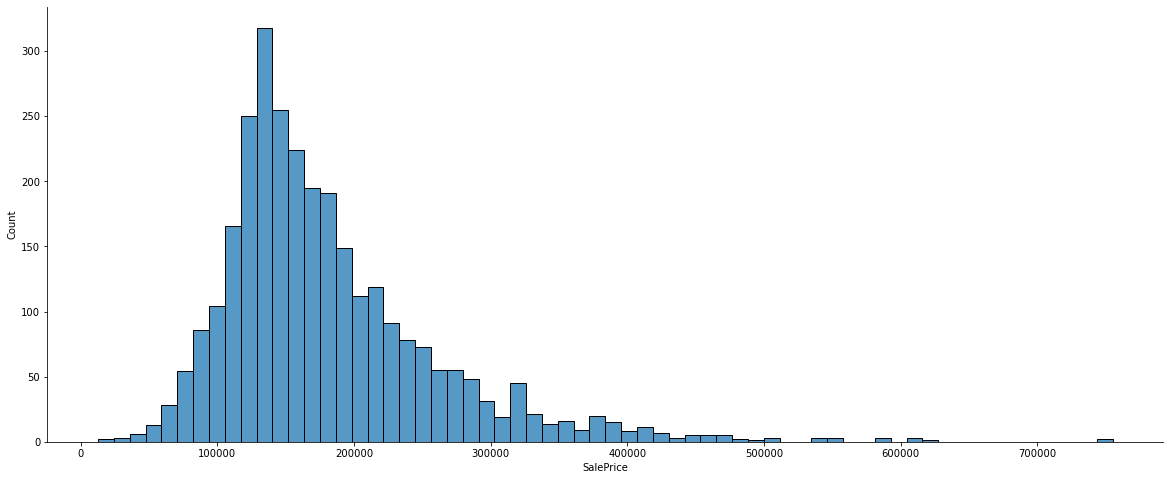

In [8]:
# plot
plt.figure(figsize=(20,8))    
sns.histplot(data['SalePrice'])
sns.despine()

In [9]:
# Target's range
data['SalePrice'].max() - data['SalePrice'].min()

742211

In [10]:
# Check for the 'too obvious' Outliers
data[data['SalePrice'] > 700000]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1760,1761,528320050,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096.0,Unf,0.0,300.0,2396.0,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1.0,0.0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3.0,813.0,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1767,1768,528351010,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0.0,989.0,2444.0,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0.0,1.0,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3.0,832.0,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [ ]:
- These entries look realistic at first glace. Though they could tarnish the performace of the model, lets keep them

---

There are **several Ordinal Variables** atleast **one Nominal Variable** that could be represented numerically but they are represented by strings.

### Data Cleaning: String to Numeric format
Lets provide tailor-made mappings to the Variables that should be represented in Numeric format. Although I'd be doing the One-Hot-Encoding later, these variables are Ordinal and hence, the encoding should be in order as well

**To do this mapping meticulously, I will take the exhaustive route**

In [11]:
LotShape_mapping = {'Reg':4, 'IR1':3, 'IR2':2, 'IR1':1}
data['Lot Shape'] = data['Lot Shape'].map(LotShape_mapping, na_action='ignore')

data['Lot Shape'].value_counts(dropna=False)

4.0    1859
1.0     979
2.0      76
NaN      16
Name: Lot Shape, dtype: int64

In [12]:
Utilities_mapping = {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1}
data['Utilities'] = data['Utilities'].map(Utilities_mapping, na_action='ignore')

data['Utilities'].value_counts(dropna=False)

4    2927
3       2
2       1
Name: Utilities, dtype: int64

In [13]:
LandSlope_mapping = {'Gtl':3, 'Mod':2, 'Sev':1}
data['Land Slope'] = data['Land Slope'].map(LandSlope_mapping, na_action='ignore')

data['Land Slope'].value_counts(dropna=False)

3    2789
2     125
1      16
Name: Land Slope, dtype: int64

In [14]:
ExterQual_mapping = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
data['Exter Qual'] = data['Exter Qual'].map(ExterQual_mapping, na_action='ignore')

data['Exter Qual'].value_counts(dropna=False)

3    1799
4     989
5     107
2      35
Name: Exter Qual, dtype: int64

In [15]:
ExterCond_mapping = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
data['Exter Cond'] = data['Exter Cond'].map(ExterCond_mapping, na_action='ignore')

data['Exter Cond'].value_counts(dropna=False)

3    2549
4     299
2      67
5      12
1       3
Name: Exter Cond, dtype: int64

In [16]:
BsmtQual_mapping  = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
data['Bsmt Qual'] = data['Bsmt Qual'].map(BsmtQual_mapping, na_action='ignore')

data['Bsmt Qual'].value_counts(dropna=False)

3.0    1283
4.0    1219
5.0     258
2.0      88
NaN      80
1.0       2
Name: Bsmt Qual, dtype: int64

In [17]:
BsmtCond_mapping = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
data['Bsmt Cond'] = data['Bsmt Cond'].map(BsmtCond_mapping, na_action='ignore')

data['Bsmt Cond'].value_counts(dropna=False)

3.0    2616
4.0     122
2.0     104
NaN      80
1.0       5
5.0       3
Name: Bsmt Cond, dtype: int64

In [18]:
BsmtExposure_mapping = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}
data['Bsmt Exposure'] = data['Bsmt Exposure'].map(BsmtExposure_mapping, na_action='ignore')

data['Bsmt Exposure'].value_counts(dropna=False)

1.0    1906
3.0     418
4.0     284
2.0     239
NaN      83
Name: Bsmt Exposure, dtype: int64

In [19]:
Functional_mapping = {'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1 }
data['Functional'] = data['Functional'].map(Functional_mapping, na_action='ignore')

data['Functional'].value_counts(dropna=False)

8    2728
6      70
7      65
5      35
4      19
3       9
1       2
2       2
Name: Functional, dtype: int64

In [20]:
BsmtFin_mapping = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}
data['BsmtFin Type 1'] = data['BsmtFin Type 1'].map(BsmtFin_mapping, na_action='ignore')

data['BsmtFin Type 1'].value_counts(dropna=False)

6.0    859
1.0    851
5.0    429
3.0    288
4.0    269
2.0    154
NaN     80
Name: BsmtFin Type 1, dtype: int64

In [21]:
HeatingQC_mapping  = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
data['Heating QC'] = data['Heating QC'].map(HeatingQC_mapping, na_action='ignore')

data['Heating QC'].value_counts(dropna=False)

5    1495
3     864
4     476
2      92
1       3
Name: Heating QC, dtype: int64

In [22]:
CentralAir_mapping = {'Y': 1, 'N':0}
data['Central Air'] = data['Central Air'].map(CentralAir_mapping, na_action='ignore')

data['Central Air'].value_counts(dropna=False)

1    2734
0     196
Name: Central Air, dtype: int64

In [23]:
Electrical_mapping = {'SBrkr':5, 'FuseA':4, 'Mix':3, 'FuseF':2, 'FuseP':1 } # Assumed category 'Mix' to be at medium
data['Electrical'] = data['Electrical'].map(Electrical_mapping, na_action='ignore')

data['Electrical'].value_counts(dropna=False)

5.0    2682
4.0     188
2.0      50
1.0       8
3.0       1
NaN       1
Name: Electrical, dtype: int64

In [24]:
KitchenQual_mapping  = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
data['Kitchen Qual'] = data['Kitchen Qual'].map(KitchenQual_mapping, na_action='ignore')

data['Kitchen Qual'].value_counts(dropna=False)

3    1494
4    1160
5     205
2      70
1       1
Name: Kitchen Qual, dtype: int64

In [25]:
FireplaceQu_mapping  = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
data['Fireplace Qu'] = data['Fireplace Qu'].map(FireplaceQu_mapping, na_action='ignore')

data['Fireplace Qu'].value_counts(dropna=False)

NaN    1422
4.0     744
3.0     600
2.0      75
1.0      46
5.0      43
Name: Fireplace Qu, dtype: int64

In [26]:
GarageFinish_mapping = {'Fin':3, 'RFn':2, 'UnF':1, 'NA':0}
data['Garage Finish'] = data['Garage Finish'].map(GarageFinish_mapping, na_action='ignore')

data['Garage Finish'].value_counts(dropna=False)

NaN    1390
2.0     812
3.0     728
Name: Garage Finish, dtype: int64

In [27]:
GarageQual_mapping  = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
data['Garage Qual'] = data['Garage Qual'].map(GarageQual_mapping, na_action='ignore')

data['Garage Qual'].value_counts(dropna=False)

3.0    2615
NaN     159
2.0     124
4.0      24
1.0       5
5.0       3
Name: Garage Qual, dtype: int64

In [28]:
GarageCond_mapping = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
data['Garage Cond'] = data['Garage Cond'].map(GarageCond_mapping, na_action='ignore')

data['Garage Cond'].value_counts(dropna=False)

3.0    2665
NaN     159
2.0      74
4.0      15
1.0      14
5.0       3
Name: Garage Cond, dtype: int64

In [29]:
PavedDrive_mapping = {'Y':3, 'P':2, 'N':1}
data['Paved Drive'] = data['Paved Drive'].map(PavedDrive_mapping, na_action='ignore')

data['Paved Drive'].value_counts(dropna=False)

3    2652
1     216
2      62
Name: Paved Drive, dtype: int64

In [30]:
PoolQC_mapping = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'NA':0}
data['Pool QC'] = data['Pool QC'].map(PoolQC_mapping, na_action='ignore')

data['Pool QC'].value_counts(dropna=False)

NaN    2917
3.0       4
4.0       4
2.0       3
1.0       2
Name: Pool QC, dtype: int64

In [31]:
Fence_mapping = {'GdPrv': 4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}
data['Fence'] = data['Fence'].map(Fence_mapping, na_action='ignore')

data['Fence'].value_counts(dropna=False)

NaN    2358
3.0     330
4.0     118
2.0     112
1.0      12
Name: Fence, dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2914 non-null   float64
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   int64  
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   int64  
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Lets start by setting up a pipeline of functions that will let us quickly iterate on different models 

---

## Setting up a Pipeline of functions
Functions that transform features, select features and train-and-test features
![pipeline](my_pipeline.PNG)

We will build our functions and make the pipeline gradually and will improve in rounds. 
So Lets begin with the round 1, where we are just writing up minimal code. As mentioned, We will keep improving on them through out this project.

## Round 1

In [33]:
# For now, just return DataFrame
def transform_features(data):
    '''
    under developement
    '''
    df = data.copy()
    return df

In [34]:
# For now, it just returns the DataFrame's two columns
def select_features(df):
    '''
    under developement
    '''
    return data[['Gr Liv Area', 'SalePrice']]

In [35]:
def train_and_test(data):
    '''
    under developement
    '''
    train = data.iloc[:1460]
    test = data.iloc[1460:]
    
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    target = 'SalePrice'
    features = numeric_train.columns.drop(target)
    
    lr = LinearRegression()
    lr.fit(train[features], train[target])
    
    predictions = lr.predict(test[features])
    
    mse = mean_squared_error(test[target], predictions)
    rmse = np.sqrt(mse)
    
    r2 = r2_score(test[target], predictions)
    
    return rmse, r2

In [36]:
# Features Transformation
round1_transformed_data = transform_features(data)

# Features Selection
round1_selected_data = select_features(round1_transformed_data)

# Training and Testing
round1_rmse_data = train_and_test(round1_selected_data)

print('So in this first and lazy attempt, we have got\nRMSE of {}\nR2 of {}'.format(round1_rmse_data[0],
                                                                                        round1_rmse_data[1]))

So in this first and lazy attempt, we have got
RMSE of 57088.25161263909
R2 of 0.5073530501149299


Let's now start removing features with missing values, diving deeper into potential categorical features, transforming text and numerical columns

---

## Round 2
Lets update the `transform_features()` function to achieve following goals
1. remove the features we don't want to use in the model.
    - based on the number of missing values
    - could cause Data Leakage


2. transform features into the proper format like
    - numerical to categorical 
    - scaling numerical
    - filling in missing values 
    - etc


3. Create new features by combining existing features


#### Lets explore the data and look for possible manuevering 

In [37]:
data.select_dtypes(include=['integer', 'float']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 60 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Lot Shape        2914 non-null   float64
 6   Utilities        2930 non-null   int64  
 7   Land Slope       2930 non-null   int64  
 8   Overall Qual     2930 non-null   int64  
 9   Overall Cond     2930 non-null   int64  
 10  Year Built       2930 non-null   int64  
 11  Year Remod/Add   2930 non-null   int64  
 12  Mas Vnr Area     2907 non-null   float64
 13  Exter Qual       2930 non-null   int64  
 14  Exter Cond       2930 non-null   int64  
 15  Bsmt Qual        2850 non-null   float64
 16  Bsmt Cond        2850 non-null   float64
 17  Bsmt Exposure 

In [38]:
data.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2930 non-null   object
 1   Street          2930 non-null   object
 2   Alley           198 non-null    object
 3   Land Contour    2930 non-null   object
 4   Lot Config      2930 non-null   object
 5   Neighborhood    2930 non-null   object
 6   Condition 1     2930 non-null   object
 7   Condition 2     2930 non-null   object
 8   Bldg Type       2930 non-null   object
 9   House Style     2930 non-null   object
 10  Roof Style      2930 non-null   object
 11  Roof Matl       2930 non-null   object
 12  Exterior 1st    2930 non-null   object
 13  Exterior 2nd    2930 non-null   object
 14  Mas Vnr Type    2907 non-null   object
 15  Foundation      2930 non-null   object
 16  BsmtFin Type 2  2849 non-null   object
 17  Heating         2930 non-null   object
 18  Garage T

#### Approach for Round 2:
Lets use this approach **for now**. We can always change thresholds and approaches to improve our score. 
- Check if we can create new features using the existing ones if newer ones can capture the details better

And for the Cleaning part, we can do following ops:
- For Ordinal columns:
    - Provide numerical replacements
- For numerical column:
    - Impute the values with mean/median/mode of Columns that have less than 5% of Null Values
- For Text columns:
    - Delete Columns with any of the Null Values
- For all the columns:
    - Delete columns that are not useful for Machine Learning
    - Delete columns that could potentially leak Data about `SalePrice`
    - Delete columns that have more than 5% of Null Values
- We will also delete some rows with extreme values as suggested in [Data Documentary](DataDocumentary.txt)
    
Since we are working out to make a standard function, our working will involve a lot of experimentation. So its a better idea to retain the original dataset and do experimentation on a copy of it.



In [39]:
df = data.copy()

In [40]:
df.select_dtypes('object').head()

,MS Zoning,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,BsmtFin Type 2,Heating,Garage Type,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NaN,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,CBlock,Unf,GasA,Attchd,NaN,WD,Normal
1,RH,Pave,NaN,Lvl,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,CBlock,LwQ,GasA,Attchd,NaN,WD,Normal
2,RL,Pave,NaN,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,CBlock,Unf,GasA,Attchd,Gar2,WD,Normal
3,RL,Pave,NaN,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,CBlock,Unf,GasA,Attchd,NaN,WD,Normal
4,RL,Pave,NaN,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,Unf,GasA,Attchd,NaN,WD,Normal


- No numerical columns are misrepresented as Strings. 

Lets check columns of Integer and Float Dtypes.

In [41]:
df.select_dtypes(['integer', 'float']).head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,1.0,4,3,6,5,1960,1960,112.0,3,3,3.0,4.0,4.0,4.0,639.0,0.0,441.0,1080.0,2,1,5.0,1656,0,0,1656,1.0,0.0,1,0,3,1,3,7,8,2,4.0,1960.0,3.0,2.0,528.0,3.0,3.0,2,210,62,0,0,0,0,NaN,NaN,0,5,2010,215000
1,2,526350040,20,80.0,11622,4.0,4,3,5,6,1961,1961,0.0,3,3,3.0,3.0,1.0,3.0,468.0,144.0,270.0,882.0,3,1,5.0,896,0,0,896,0.0,0.0,1,0,2,1,3,5,8,0,NaN,1961.0,NaN,1.0,730.0,3.0,3.0,3,140,0,0,0,120,0,NaN,3.0,0,6,2010,105000
2,3,526351010,20,81.0,14267,1.0,4,3,6,6,1958,1958,108.0,3,3,3.0,3.0,1.0,5.0,923.0,0.0,406.0,1329.0,3,1,5.0,1329,0,0,1329,0.0,0.0,1,1,3,1,4,6,8,0,NaN,1958.0,NaN,1.0,312.0,3.0,3.0,3,393,36,0,0,0,0,NaN,NaN,12500,6,2010,172000
3,4,526353030,20,93.0,11160,4.0,4,3,7,5,1968,1968,0.0,4,3,3.0,3.0,1.0,5.0,1065.0,0.0,1045.0,2110.0,5,1,5.0,2110,0,0,2110,1.0,0.0,2,1,3,1,5,8,8,2,3.0,1968.0,3.0,2.0,522.0,3.0,3.0,3,0,0,0,0,0,0,NaN,NaN,0,4,2010,244000
4,5,527105010,60,74.0,13830,1.0,4,3,5,5,1997,1998,0.0,3,3,4.0,3.0,1.0,6.0,791.0,0.0,137.0,928.0,4,1,5.0,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,8,1,3.0,1997.0,3.0,2.0,482.0,3.0,3.0,3,212,34,0,0,0,0,NaN,3.0,0,3,2010,189900


By looking closely at numerical features, three of them should catch our attention. The features are `Year Built`, `Year Remod/Add` and `Yr Sold`.
`Year Built` is about the year property was built. `Year Remod/Add` tells us about last modification if there is any. Whereas `Yr Sold` tells us about the year of sale of the property. 
There features might become far more impactful if we combine them to calculate "Age of house", and "Years since alteration"

Lets do it for now by creating a new features
- `age` that will be formed by subtracting `Year Built` from `Yr Sold` and 
- `years_remod` that will be formed by subtracting `Year Remod/Add` from `Yr Sold`

In [42]:
df['age'] = df['Yr Sold'] - df['Year Built']  

In [43]:
df['years_remod'] = df['Yr Sold'] - df['Year Remod/Add']  

We rarely get to have a perfect data!
On running **value_counts() on both of our new columns, we found out some samples with negative values.**

In [44]:
# capture these rows
del_us = df[(df['age'] < 0) | (df['years_remod'] < 0)]
del_us

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,age,years_remod
1702,1703,528120010,60,RL,134.0,16659,Pave,NaN,1.0,Lvl,4,Corner,3,NridgHt,Norm,Norm,1Fam,2Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4.0,3.0,1.0,1.0,0.0,Unf,0.0,1582.0,1582.0,GasA,5,1,5.0,1582,570,0,2152,0.0,0.0,2,1,3,1,4,7,8,1,4.0,Detchd,2007.0,NaN,2.0,728.0,3.0,3.0,3,0,368,0,0,0,0,NaN,NaN,NaN,0,6,2007,New,Partial,260116,0,-1
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,1.0,Bnk,4,Inside,3,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,5,3,PConc,5.0,3.0,4.0,6.0,4010.0,Unf,0.0,1085.0,5095.0,GasA,5,1,5.0,5095,0,0,5095,1.0,1.0,2,1,2,1,5,15,8,2,4.0,Attchd,2008.0,3.0,3.0,1154.0,3.0,3.0,3,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850,-1,-2
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,1.0,Bnk,4,Inside,3,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,5,3,PConc,5.0,3.0,4.0,6.0,2260.0,Unf,0.0,878.0,3138.0,GasA,5,1,5.0,3138,1538,0,4676,1.0,0.0,3,1,3,1,5,11,8,1,4.0,BuiltIn,2007.0,3.0,3.0,884.0,3.0,3.0,3,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750,0,-1


In [45]:
# Lets remove these rows.
df.drop(del_us.index, axis=0, inplace=True)

#### Data Cleaning
Lets check the columns with Null Values less than 5% and delete them after consideration

In [46]:
# Series of Columns with percentages of Null values in them
null_series = pd.Series(df.isnull().sum()/len(df) * 100)

# Filtering out the columns with more than 5% Null values
null_series[null_series > 5.0].sort_values()

Garage Type       5.363854
Garage Yr Blt     5.432183
Garage Qual       5.432183
Garage Cond       5.432183
Lot Frontage     16.740690
Garage Finish    47.454732
Fireplace Qu     48.582166
Fence            80.457807
Alley            93.235395
Misc Feature     96.412709
Pool QC          99.555859
dtype: float64

In [47]:
len(df.columns)

84

We have an interesting situation here. Columns like `Pool QC`, `Misc Feature`, `Alley`, `Fence`, `Fireplace QU`, `Garage Finish` will be deleted straight away because they contain a lot of Null values.

However, the columns that contain Null Values just above 5% are all related to Garage. 
By reading [Data Documentation](DataDocumentation.txt), we can see that most of them are text columns of ordinal and nominal variables. And those columns already have **NA** option provided. So we can not take Null Value as **NA** either. Also, during the mapping we performed, **NA** were encoded as Zeros **0**
Lets Delete all for them for now

In [48]:
# Cutoff at 5%. (1-0.05 = 0.95)
df = df.dropna(thresh=df.shape[0]*0.95, axis=1)

In [49]:
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Area            0
Street              0
Lot Shape          16
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type       23
Mas Vnr Area       23
Exter Qual          0
Exter Cond          0
Foundation          0
Bsmt Qual          80
Bsmt Cond          80
Bsmt Exposure      83
BsmtFin Type 1     80
BsmtFin SF 1        1
BsmtFin Type 2     81
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Heating             0
Heating QC          0
Central Air         0
Electrical          1
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
Gr Liv Are

- Columns with more than 5% Null values removed successfully

**Lets segregate our DataFrame into Object and Numeric Dtypes**

In [50]:
text_df = df.select_dtypes(include='object')
text_df.head(3)

,MS Zoning,Street,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,BsmtFin Type 2,Heating,Sale Type,Sale Condition
0,RL,Pave,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,CBlock,Unf,GasA,WD,Normal
1,RH,Pave,Lvl,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,CBlock,LwQ,GasA,WD,Normal
2,RL,Pave,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,CBlock,Unf,GasA,WD,Normal


In [51]:
numeric_df = df.select_dtypes(include=['integer','float'])
numeric_df.head(3)

,Order,PID,MS SubClass,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,age,years_remod
0,1,526301100,20,31770,1.0,4,3,6,5,1960,1960,112.0,3,3,3.0,4.0,4.0,4.0,639.0,0.0,441.0,1080.0,2,1,5.0,1656,0,0,1656,1.0,0.0,1,0,3,1,3,7,8,2,2.0,528.0,2,210,62,0,0,0,0,0,5,2010,215000,50,50
1,2,526350040,20,11622,4.0,4,3,5,6,1961,1961,0.0,3,3,3.0,3.0,1.0,3.0,468.0,144.0,270.0,882.0,3,1,5.0,896,0,0,896,0.0,0.0,1,0,2,1,3,5,8,0,1.0,730.0,3,140,0,0,0,120,0,0,6,2010,105000,49,49
2,3,526351010,20,14267,1.0,4,3,6,6,1958,1958,108.0,3,3,3.0,3.0,1.0,5.0,923.0,0.0,406.0,1329.0,3,1,5.0,1329,0,0,1329,0.0,0.0,1,1,3,1,4,6,8,0,1.0,312.0,3,393,36,0,0,0,0,12500,6,2010,172000,52,52


For text columns, lets remove every column that contains any Null value for now.

In [52]:
# Select Object dtype, and drop column (axis=1) with any missing values values (how='all')
text_df = text_df.dropna(how='any', axis=1)
text_df.shape

(2927, 17)

For the remaining numerical columns, Lets use 
- Median to impute Ordinal Variables
- Mean for Continuous Variables

In [53]:
# Take out the columns using isna() and any() and Segregate their names in a list.
impute_these = numeric_df.columns[numeric_df.isna().any()].tolist()
impute_these

['Lot Shape',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Electrical',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Cars',
 'Garage Area']

In [54]:
# We will use median to replace the missing missing values of following columns. They were mapped to numerical values
cols_median = ['Lot Shape', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars']

# Use Mean for imputations
cols_mean = []
for col in impute_these:
    if col not in cols_median:
        cols_mean.append(col)
cols_mean

['Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Garage Area']

In [55]:
for col in cols_median:
    numeric_df[col].fillna(numeric_df[col].median(), inplace=True)
for col in cols_mean:
    numeric_df[col].fillna(numeric_df[col].mean(), inplace=True)
# Will resolve the SettingWithCopyWarning issue while building function

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Lets delete `Order` and `PID` columns

In [56]:
numeric_df = numeric_df.drop(['Order', 'PID'], axis=1)

Following Columns can potentially Leak Data to our target variable `SalePrice`:
    
`Mo Sold`, `Sale Condition`, `Sale Type`, `Yr Sold`. For more information, check out [Data Documentation](DataDocumentation.txt)

Lets remove them as well. We will remove them from our Sub-DataFrames. We will concatenate out Sub-DataFrames later

In [57]:
numeric_df = numeric_df.drop(['Mo Sold', 'Yr Sold'], axis=1)

In [58]:
text_df = text_df.drop(['Sale Type', 'Sale Condition'], axis=1)

???Lets keep the deletion of rows with extremities after concatenating both DataFrames, that we will do in the function.

In [59]:
data = pd.read_table('AmesHousing.tsv', delimiter="\t")

### Updating Our Function

In [60]:
def transform_features(data):
    '''
    Transforms the DataFrame. It replicates
    the work done in preceding code.
    
    Args:
        data: The Dataframe
    Returns:
        transformed DataFrame
    '''
    # Create a Copy
    df = data.copy()
    
    # Provide Substitute numbers for Ordinal Values
    LotShape_mapping = {'Reg':4, 'IR1':3, 'IR2':2, 'IR1':1}
    df['Lot Shape'] = df['Lot Shape'].map(LotShape_mapping, na_action='ignore')

    Utilities_mapping = {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1}
    df['Utilities'] = df['Utilities'].map(Utilities_mapping, na_action='ignore')

    LandSlope_mapping = {'Gtl':3, 'Mod':2, 'Sev':1}
    df['Land Slope'] = df['Land Slope'].map(LandSlope_mapping, na_action='ignore')

    ExterQual_mapping = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
    df['Exter Qual'] = df['Exter Qual'].map(ExterQual_mapping, na_action='ignore')

    ExterCond_mapping = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
    df['Exter Cond'] = df['Exter Cond'].map(ExterCond_mapping, na_action='ignore')

    BsmtQual_mapping  = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
    df['Bsmt Qual'] = df['Bsmt Qual'].map(BsmtQual_mapping, na_action='ignore')

    BsmtCond_mapping = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
    df['Bsmt Cond'] = df['Bsmt Cond'].map(BsmtCond_mapping, na_action='ignore')

    BsmtExposure_mapping = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}
    df['Bsmt Exposure'] = df['Bsmt Exposure'].map(BsmtExposure_mapping, na_action='ignore')

    BsmtFin_mapping = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}
    df['BsmtFin Type 1'] = df['BsmtFin Type 1'].map(BsmtFin_mapping, na_action='ignore')
    
    Functional_mapping = {'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1 }
    df['Functional'] = df['Functional'].map(Functional_mapping, na_action='ignore')

    HeatingQC_mapping  = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
    df['Heating QC'] = df['Heating QC'].map(HeatingQC_mapping, na_action='ignore')

    CentralAir_mapping = {'Y': 1, 'N':0}
    df['Central Air'] = df['Central Air'].map(CentralAir_mapping, na_action='ignore')

    Electrical_mapping = {'SBrkr':5, 'FuseA':4, 'Mix':3, 'FuseF':2, 'FuseP':1 } # Assumed category 'Mix' to be at medium
    df['Electrical'] = df['Electrical'].map(Electrical_mapping, na_action='ignore')

    KitchenQual_mapping  = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
    df['Kitchen Qual'] = df['Kitchen Qual'].map(KitchenQual_mapping, na_action='ignore')

    FireplaceQu_mapping  = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
    df['Fireplace Qu'] = df['Fireplace Qu'].map(FireplaceQu_mapping, na_action='ignore')

    GarageFinish_mapping = {'Fin':3, 'RFn':2, 'UnF':1, 'NA':0}
    df['Garage Finish'] = df['Garage Finish'].map(GarageFinish_mapping, na_action='ignore')

    GarageQual_mapping  = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
    df['Garage Qual'] = df['Garage Qual'].map(GarageQual_mapping, na_action='ignore')

    GarageCond_mapping = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
    df['Garage Cond'] = df['Garage Cond'].map(GarageCond_mapping, na_action='ignore')

    PavedDrive_mapping = {'Y':3, 'P':2, 'N':1}
    df['Paved Drive'] = df['Paved Drive'].map(PavedDrive_mapping, na_action='ignore')

    PoolQC_mapping = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'NA':0}
    df['Pool QC'] = df['Pool QC'].map(PoolQC_mapping, na_action='ignore')

    Fence_mapping = {'GdPrv': 4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}
    df['Fence'] = df['Fence'].map(Fence_mapping, na_action='ignore')
    
    
    # Create new features and Clean
    df['age'] = df['Yr Sold'] - df['Year Built']  
    df['years_remod'] = df['Yr Sold'] - df['Year Remod/Add']
    del_us = df[(df['age'] < 0) | (df['years_remod'] < 0)]
    df.drop(del_us.index, axis=0, inplace=True)

    df = df.dropna(thresh=df.shape[0]*0.95, axis=1)
    
    # Break the DataFrame WRT Dtype and Clean parts
    text_df = df.select_dtypes(include='object')
    text_df = text_df.dropna(how='any', axis=1)
    numeric_df = df.select_dtypes(include=['integer','float'])

    numeric_df = numeric_df.drop(['Order', 'PID', 'Mo Sold', 'Yr Sold'], axis=1)
    cols_median = ['Lot Shape', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
                   'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars']
    cols_mean = []
    for col in impute_these:
        if col not in cols_median:
            cols_mean.append(col)
        
    for col in cols_median:
        numeric_df[col].fillna(numeric_df[col].median(), inplace=True)
    for col in cols_mean:
        numeric_df[col].fillna(numeric_df[col].mean(), inplace=True)

    
    
    text_df = text_df.drop(['Sale Type', 'Sale Condition'], axis=1)
    
    # Concatenate the DataFrame pieces
    df = pd.concat([numeric_df, text_df], axis=1)
    
    # Do more Cleaning
    extreme_rows = df[df['Gr Liv Area'] > 4000]
    df = df.drop(extreme_rows.index, axis = 0)
    
    
    # Return
    return df

The functions `select_features()` and `train_test()` are still as they are

In [61]:
# We updated transform_features()
round2_transformed_data = transform_features(data)

# We have NOT updated select_features(), So it is still taking only 2 columns
round2_selected_data = select_features(round2_transformed_data)

# We have NOT updated test_and_train() either!
round2_rmse_data = train_and_test(round2_selected_data)

print(round2_rmse_data)

(57088.25161263909, 0.5073530501149299)


In [62]:
print('Our RMSE for this attempt is around {:.2f} and\nWith an impovement in RMSE of around USD {:.2f}\nThats almost {:.1f}% improvement in the RMSE results'.
      format(round2_rmse_data[0], round1_rmse_data[0]-round2_rmse_data[0], (round1_rmse_data[0]-round2_rmse_data[0])/round1_rmse_data[0]*100))
print('\nWhereas our R2 score in the previous attempt was\n{:.2f} and now, it has become {:.2f}'.format(round1_rmse_data[1], round2_rmse_data[1]))

Our RMSE for this attempt is around 57088.25 and
With an impovement in RMSE of around USD 0.00
Thats almost 0.0% improvement in the RMSE results

Whereas our R2 score in the previous attempt was
0.51 and now, it has become 0.51


---

## Round 3
Its time to move on to **Feature Selection** for numerical columns
- Which features correlate strongly with our target variable `SalePrice`?
    - What are the Correlation Coefficients of features that correlate well
- Which columns in the DataFrame should be converted to Categorical Dtype (All the columns that can be categorized as nominal variables are candidates for being converted into Categorical
- Which columns are currently numerical but need to be encoded as Categorical instead

In the end, we will update the logic to our functions

- Another important thing is to check for **Collinearity**. With an exception for the target `SalePrice`, we will abandon one of the column that share > 0.7 Correlation to eachother. 

### Lets handle the MultiCollinearity first

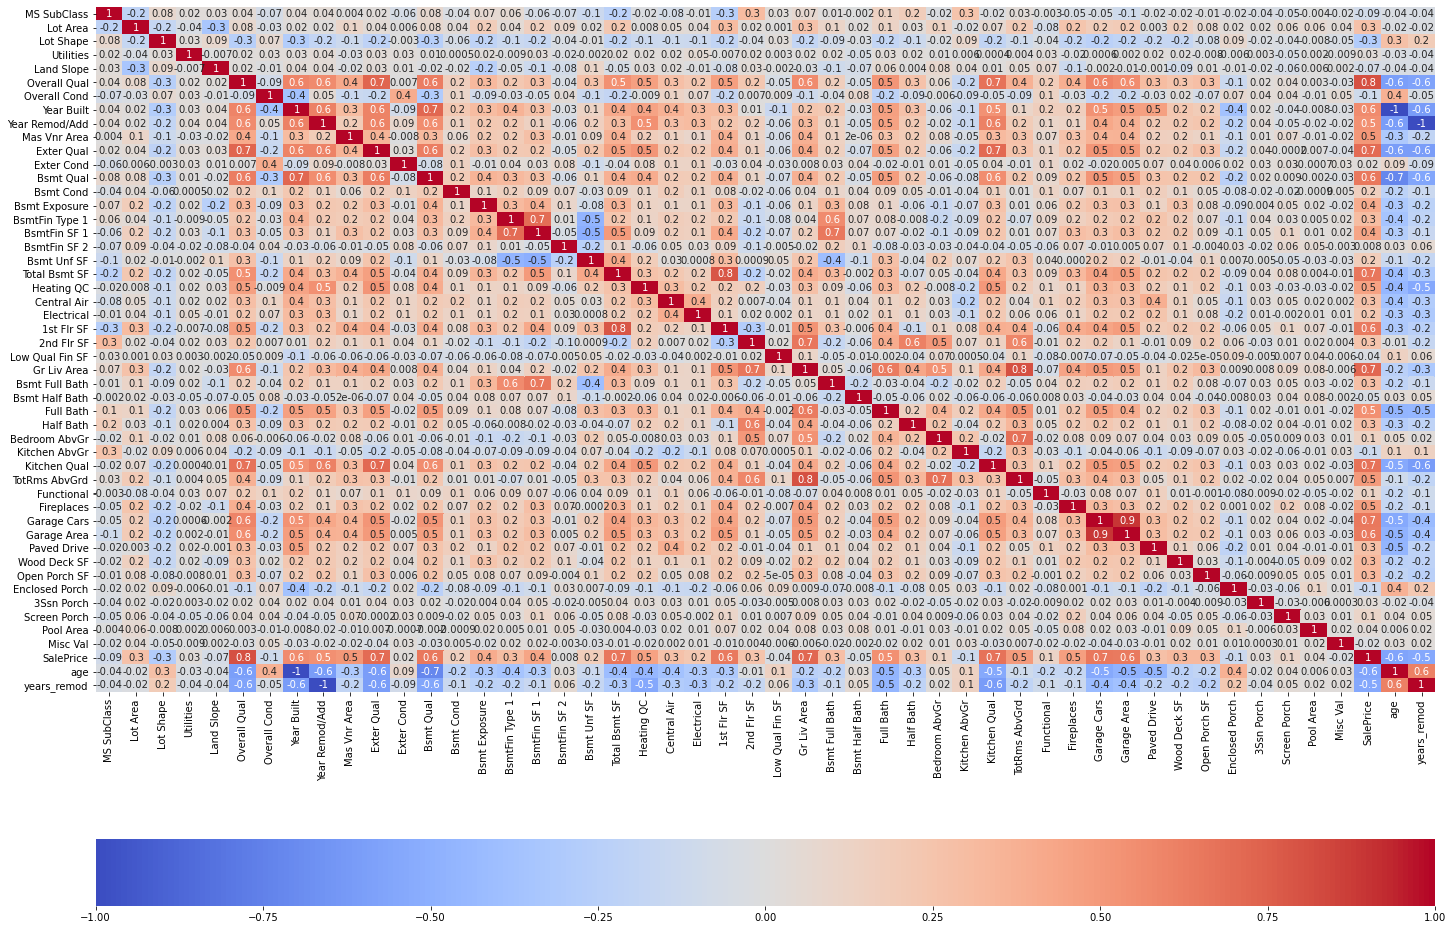

In [63]:
# Lets Plot a Correlation Matrix
numeric_df = round2_transformed_data.select_dtypes(['integer', 'float'])

plt.figure(figsize=(24,18))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm',cbar_kws= {'orientation': 'horizontal'})

- Its hard to see the pairs in this congested Heatmap. To help ourself, lets first find all the columns that have > 0.7 of the Correlation

In [64]:
df_corr = numeric_df.corr().abs()
check_c = df_corr[(df_corr >= 0.7) & (df_corr < 1.00)] # Adding condition df_corr < 1.00 to avoid same columns overlapping 
cols_c = check_c.loc[check_c[col] != np.nan].any(axis=0) 
print('Following columns are collinear with other columns\n{}.\nTo find pairs, Kindly consult the heatmap'.format(cols_c[cols_c==True].index))


Following columns are collinear with other columns
Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Exter Qual',
       'Bsmt Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area',
       'Kitchen Qual', 'TotRms AbvGrd', 'Garage Cars', 'Garage Area',
       'SalePrice', 'age', 'years_remod'],
      dtype='object').
To find pairs, Kindly consult the heatmap


Text(0.5, 1.0, 'COLLINEARITY CHECK!\nCorrelations that are greater either greater than 0.7\nOr Less than -0.7')

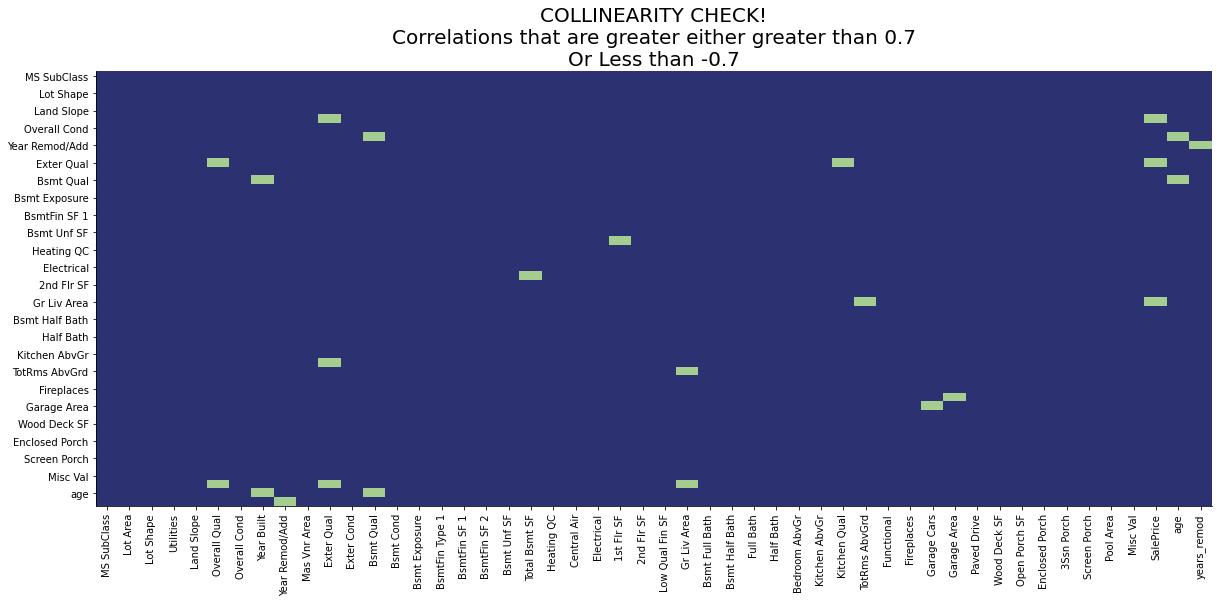

In [65]:
# check_c shows only the ABSOLUTE Correlations greater than 0.7 and less than 1.00
plt.figure(figsize=(20,8))    
sns.heatmap(check_c.isnull(), cbar=False, cmap='crest')
sns.despine()
plt.title('COLLINEARITY CHECK!\nCorrelations that are greater either greater than 0.7\nOr Less than -0.7', fontsize=20)

Lets also see how do these columns **correlate with the target, `SalePrice`**

In [66]:
numeric_df[cols_c[cols_c == True].index].corr()['SalePrice']

Overall Qual      0.805160
Year Built        0.564935
Year Remod/Add    0.540110
Exter Qual        0.704824
Bsmt Qual         0.649699
Total Bsmt SF     0.658316
1st Flr SF        0.642763
Gr Liv Area       0.719345
Kitchen Qual      0.676754
TotRms AbvGrd     0.498450
Garage Cars       0.652498
Garage Area       0.648163
SalePrice         1.000000
age              -0.565314
years_remod      -0.541941
Name: SalePrice, dtype: float64

Following are the **most Correlated Features** with `SalePrice`
- `Overall quality`
- `Gr Liv Area` 
- `Exter Qual`
- `Kitchen Qual`
- `Total Bsmt SF` 
- `Garage Cars`
- `Garage Area` 
- `1st Flr SF` 
- `Years Before Sale`
- `Years Since Remod`

Within these features, there is a **high correlation present between them that could be collinearity as well**
- `Total Bsmt SF` and `1st Flr SF`
- `BsmtFin Type 1` and `1st Flr SF`
    - We will take`Total Bsmt SF` and **drop** `1st Flr SF`, and `BsmtFin Type 1`


- `Overall Qual`, `Exter Qual`, `Bsmt Qual` and `Kitchen Qual`
    - We will only take `Overall Qual` and **drop** `Exter Qual`, `Bsmt Qual` and `Kitchen Qual`


- `Garage Cars` and `Garage Area`
    - We will take `Garage Area` and **drop** `Garage Cars`


- `BsmtFin Type 1`, `Bsmt Full Bath` and `BsmtFin SF 1`
    - We will take `Bmst Full Bath` and **drop** `BsmtFin Type 1` and `BsmtFin SF 1`


- `Gr Liv Area`, `TotRmsAbvGrd` and `2nd Flr SF`
    - We will take `Gr Liv Area` and **drop**  `TotRmsAbvGrd` and `2nd Flr SF`


- Since the columns `age` and `years_remod` were engineered from columns `Year Built` and `Year Remod/Add`, a very high correlation. though negative, can be seen among them.
    - We will take `age` and `years_remod` and **drop** `Year Built` and `Year Remod/Add`

In [67]:
drop_c = ['1st Flr SF', 'BsmtFin Type 1', 'Exter Qual', 'Bsmt Qual', 'Kitchen Qual', 
         'Garage Cars', 'BsmtFin SF 1', 'TotRms AbvGrd', '2nd Flr SF', 'Year Built', 
         'Year Remod/Add']

In [68]:
numeric_df = numeric_df.drop(drop_c, axis=1)

In [69]:
# Taking Correlation Coeffients
abs_corr_coeffs = numeric_df.corr()['SalePrice'].abs().sort_values(ascending=False)

# Displaying head only
abs_corr_coeffs.head(10)

SalePrice        1.000000
Overall Qual     0.805160
Gr Liv Area      0.719345
Total Bsmt SF    0.658316
Garage Area      0.648163
age              0.565314
Full Bath        0.544366
years_remod      0.541941
Mas Vnr Area     0.510928
Fireplaces       0.474777
Name: SalePrice, dtype: float64

Lets keep the columns with correlation coeffients above 0.4 

We will change it to get better results later.

In [70]:
abs_corr_coeffs[abs_corr_coeffs > 0.4]

SalePrice        1.000000
Overall Qual     0.805160
Gr Liv Area      0.719345
Total Bsmt SF    0.658316
Garage Area      0.648163
age              0.565314
Full Bath        0.544366
years_remod      0.541941
Mas Vnr Area     0.510928
Fireplaces       0.474777
Heating QC       0.454140
Bsmt Exposure    0.400067
Name: SalePrice, dtype: float64

In [71]:
# Drop any columns that are less correlant that 0.4.
round2_transformed_data = round2_transformed_data.drop(abs_corr_coeffs[abs_corr_coeffs < 0.4].index, axis=1)

#### Moving on to Categorical Columns 
All nominal variables are the candidates of being converted to Categorical Dtype. Let's check the nominal variables for
- Unique values in them. We have to be vary of columns that contain too many unique values
- Columns that have an overwhelming percentage of a certain value. They are akin to low-variance numerical feature (no variability in the data for model to capture). For example if a column has a few unique values but more than 95% of the values belong to a specific category.

We also have to look into columns that are currently in numerical encoding but could do much better with Categorical encoding 


In [72]:
# according to the Data Documentary, following are the nominal variables
nominal_features_all = [ 'PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 
                     'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 
                     'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 
                     'Misc Feature', 'Sale Type', 'Sale Condition']

# We need to retrieve the columns that exist in our functioning DataFrame, i-e, round2_transformed_data
nominal_features = [] 
for name in nominal_features_all:
    if name in round2_transformed_data.columns:
        nominal_features.append(name)
nominal_features

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating']

In [73]:
text_df[nominal_features].head()

,MS Zoning,Street,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Foundation,Heating
0,RL,Pave,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,CBlock,GasA
1,RH,Pave,Lvl,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,CBlock,GasA
2,RL,Pave,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,CBlock,GasA
3,RL,Pave,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,CBlock,GasA
4,RL,Pave,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA


In [74]:
# Lets check the frequency tables with value_counts
for col in nominal_features:
    print(col,'\n',round2_transformed_data[col].value_counts(), '\n', 'NUNIQUE:',
         round2_transformed_data[col].nunique(), '\n', '-'*20)

MS Zoning 
 RL         2267
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: MS Zoning, dtype: int64 
 NUNIQUE: 7 
 --------------------
Street 
 Pave    2912
Grvl      12
Name: Street, dtype: int64 
 NUNIQUE: 2 
 --------------------
Land Contour 
 Lvl    2630
HLS     120
Bnk     114
Low      60
Name: Land Contour, dtype: int64 
 NUNIQUE: 4 
 --------------------
Lot Config 
 Inside     2138
Corner      507
CulDSac     180
FR2          85
FR3          14
Name: Lot Config, dtype: int64 
 NUNIQUE: 5 
 --------------------
Neighborhood 
 NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    165
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2


In [75]:
text_df.head()

,MS Zoning,Street,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Foundation,Heating
0,RL,Pave,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,CBlock,GasA
1,RH,Pave,Lvl,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,CBlock,GasA
2,RL,Pave,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,CBlock,GasA
3,RL,Pave,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,CBlock,GasA
4,RL,Pave,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA


In [76]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MS Zoning     2927 non-null   object
 1   Street        2927 non-null   object
 2   Land Contour  2927 non-null   object
 3   Lot Config    2927 non-null   object
 4   Neighborhood  2927 non-null   object
 5   Condition 1   2927 non-null   object
 6   Condition 2   2927 non-null   object
 7   Bldg Type     2927 non-null   object
 8   House Style   2927 non-null   object
 9   Roof Style    2927 non-null   object
 10  Roof Matl     2927 non-null   object
 11  Exterior 1st  2927 non-null   object
 12  Exterior 2nd  2927 non-null   object
 13  Foundation    2927 non-null   object
 14  Heating       2927 non-null   object
dtypes: object(15)
memory usage: 365.9+ KB


- Columns namely `Heating`, `Roof Matl`, `Condition 2`, `Land Contour`, `Street`, `Central Air` have one value each that has an overwhelming presence.
- Columns `Exterior 1st`, `Exterior 2nd` and `Neighborhood` contain relatively larger number of unique values.
    - We should decide among either to take them all, leave them all or define a threshold which could be modified later
        

In [77]:
round2_transformed_data.shape

(2924, 38)

In [78]:
# This is the frequency table showing how much the MOST FREQUENT value is occupying of the total column. 
top_cat_freq = {}
for col in nominal_features:
    top_cat_freq[col] = round2_transformed_data[col].value_counts(normalize=True, ascending=False)[0]
    #print(col, round2_transformed_data[col].value_counts(normalize = True, ascending = False)[0])
top_cat_freq = pd.Series(top_cat_freq)
top_cat_freq.sort_values(ascending=False)

Street          0.995896
Condition 2     0.990082
Roof Matl       0.985978
Heating         0.984610
Land Contour    0.899453
Condition 1     0.861149
Bldg Type       0.827291
Roof Style      0.793092
MS Zoning       0.775308
Lot Config      0.731190
House Style     0.506156
Foundation      0.445964
Exterior 1st    0.350547
Exterior 2nd    0.346785
Neighborhood    0.151505
dtype: float64

In [79]:
# Adjust an arbitrary cutoff at 0.85
myraid_cutoff = 0.85

# Because of some unusual errors, I introduced the dictionary rather than pulling out the columns directly
myraid_dict = {}
for col in nominal_features:
    myraid = round2_transformed_data[col].value_counts(normalize = True, ascending = False)[0]
    myraid_dict[col] = myraid
for key, val in myraid_dict.items():
    if val > myraid_cutoff:
        nominal_features.remove(key)
        round2_transformed_data.drop(key, axis=1, inplace=True)
round2_transformed_data.shape

(2924, 32)

In [80]:
# Adjust an arbitrary cutoff at 10, to avoid too many Categorical Columns
nunique_thresh = 10
nunique_dict = {}
for col in nominal_features:
    nunique_dict[col] = round2_transformed_data[col].nunique()
for key, val in nunique_dict.items():
    if val > nunique_thresh:
        round2_transformed_data.drop(key, axis=1, inplace=True)
        nominal_features.remove(key)
print(nunique_dict)

{'MS Zoning': 7, 'Lot Config': 5, 'Neighborhood': 28, 'Bldg Type': 5, 'House Style': 8, 'Roof Style': 6, 'Exterior 1st': 16, 'Exterior 2nd': 17, 'Foundation': 6}


In [81]:
print(round2_transformed_data.shape)

(2924, 29)


Lets look into the numerical variables that can possibly do better being categorical

In [82]:
for col in round2_transformed_data.select_dtypes(['integer', 'float']).columns:
    pass
    # Backspace Pass and Uncomment to run
    # print(col, '\n', round2_transformed_data[col].value_counts(), '\n')

- Ordinal Variables:
    - `Overall Qual`
- Discrete Variables:
    - `Year Built`, `Year Remod/Add`, `Full Bath`, `TotRmsAbvGrd`, `Fireplaces`, `years_remod`, `age`
- Continuous Variables:
    - `1st Flr SF`, `Gr Liv Area`, `SalePrice`
    
So far, its difficult to see any 'plain' nominal variable in above-given columns. We can't assume Ordinal Variables as to be Nominal ones.

Let's move on for now

In [83]:
round2_transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 2929
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Overall Qual    2924 non-null   int64  
 1   Year Built      2924 non-null   int64  
 2   Year Remod/Add  2924 non-null   int64  
 3   Mas Vnr Area    2924 non-null   float64
 4   Exter Qual      2924 non-null   int64  
 5   Bsmt Qual       2924 non-null   float64
 6   Bsmt Exposure   2924 non-null   float64
 7   BsmtFin Type 1  2924 non-null   float64
 8   BsmtFin SF 1    2924 non-null   float64
 9   Total Bsmt SF   2924 non-null   float64
 10  Heating QC      2924 non-null   int64  
 11  1st Flr SF      2924 non-null   int64  
 12  2nd Flr SF      2924 non-null   int64  
 13  Gr Liv Area     2924 non-null   int64  
 14  Full Bath       2924 non-null   int64  
 15  Kitchen Qual    2924 non-null   int64  
 16  TotRms AbvGrd   2924 non-null   int64  
 17  Fireplaces      2924 non-null   i

In [84]:
# Select just the remaining text columns and convert to categorical
text_cols = round2_transformed_data.select_dtypes(include=['object'])

for col in text_cols:
    round2_transformed_data[col] = round2_transformed_data[col].astype('category')
    
# Create dummy columns and add back to the dataframe!
dummies = pd.get_dummies(round2_transformed_data.select_dtypes(include=['category']))

# Concatenate back
round2_transformed_data = pd.concat([round2_transformed_data, dummies], axis=1)

# Drop the original ones
round2_transformed_data = round2_transformed_data.drop(text_cols, axis=1)

# Check
round2_transformed_data.head(5)

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,SalePrice,age,years_remod,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,6,1960,1960,112.0,3,3.0,4.0,4.0,639.0,1080.0,2,1656,0,1656,1,3,7,2,2.0,528.0,215000,50,50,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,5,1961,1961,0.0,3,3.0,1.0,3.0,468.0,882.0,3,896,0,896,1,3,5,0,1.0,730.0,105000,49,49,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,6,1958,1958,108.0,3,3.0,1.0,5.0,923.0,1329.0,3,1329,0,1329,1,4,6,0,1.0,312.0,172000,52,52,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,7,1968,1968,0.0,4,3.0,1.0,5.0,1065.0,2110.0,5,2110,0,2110,2,5,8,2,2.0,522.0,244000,42,42,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,5,1997,1998,0.0,3,4.0,1.0,6.0,791.0,928.0,4,928,701,1629,2,3,6,1,2.0,482.0,189900,13,12,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


### Updating Our Function
Lets update the function with all the operations we performed in previous cells 

In [85]:
def select_features(data, coef_cutoff, cardinality_thresh, myraid_cutoff):
    '''
    The function replicates the code done in prior cells. 
    It selects the features we define to be appropriate
    
    Args:
        df: DataFrame
        coef_cutoff: Selects the minimum Coefficient of Correlation as Cut off 
        myraid_cutoff: Selects the maximum acceptable presence of the Mode value in its column
        nunique_thresh: Selects the maximum number of unique values for a column to be acceptable
        
    Return:
        DataFrame with requested changes and Dummy Variables for Nominal Variables
    '''


    df = data.copy()
    # Lists of all the columns with their names segregated into 3 types
    numeric_cols = ['Order','Year Built','Year Remod/Add','Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom','Kitchen','TotRmsAbvGrd',
                    'Fireplaces','Garage Yr Blt','Garage Cars','Mo Sold','Yr Sold','Lot Frontage','Lot Area','Mas Vnr Area','BsmtFin SF 1',
                    'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Garage Area',
                    'Wood Deck SF','Open Porch SF','Enclosed Porch','3-Ssn Porch','Screen Porch','Pool Area','Misc Val','SalePrice']
                    
    ordinal_cols = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 
                    'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFinType 2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
                    'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']                

    nominal_cols = ['PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 
                    'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating',	
                    'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type', 'Sale Condition']

    # Following columns exhibited Colinearity. Drop them
    drop_c = ['1st Flr SF', 'BsmtFin Type 1', 'Exter Qual', 'Bsmt Qual', 'Kitchen Qual', 
              'Garage Cars', 'BsmtFin SF 1', 'TotRms AbvGrd', '2nd Flr SF', 'Year Built', 
              'Year Remod/Add']
    df = df.drop(drop_c, axis=1)
    
    
    
    # Since we removed some columns earlier, 
    numeric_cols = [col for col in numeric_cols if col in df.columns]
    numeric_df = df[numeric_cols].copy()
    ordinal_cols = [col for col in ordinal_cols if col in df.columns]
    ordinal_df = df[ordinal_cols].copy()
    nominal_cols = [col for col in nominal_cols if col in df.columns]
    nominal_df = df[nominal_cols].copy()

    # NUMERICAL DF
    # Columns with the minumum Coefficient of Correlation. 
    abs_corr_coeffs = numeric_df.corr()['SalePrice'].abs().sort_values(ascending=False)
    numeric_df = numeric_df.drop(abs_corr_coeffs[abs_corr_coeffs < coef_cutoff].index, axis=1)


    # Columns with least Cardinality in order to avoid too many columns
    cardinality_dict = {}
    for col in nominal_df.columns:
        cardinality_dict[col] = nominal_df[col].nunique()
    for key, val in cardinality_dict.items():
        if val > cardinality_thresh:
            nominal_df.drop(key, axis=1, inplace=True)
    nominal_cols = nominal_df.copy().columns.tolist()
   
    # CATEGORICAL DF
    categorical_df = pd.concat([nominal_df, ordinal_df], axis=1)
    # Columns with minimum acceptable presence of mode value in the columns to avoid Low Variance Features
    myraid_dict = {}
    for col in categorical_df.columns:
        sum_val = categorical_df[col].value_counts().sum()
        max_val = categorical_df[col].value_counts().max()
        myraid = max_val/sum_val
        myraid_dict[col] = myraid
    for key, val in myraid_dict.items():
        if val > myraid_cutoff:
            categorical_df.drop(key, axis=1, inplace=True)

    nominal_cols_final = [col for col in nominal_cols if col in categorical_df.columns].copy()
    nominal_df_final = df[nominal_cols_final].copy()
    nominal_df_final_dummies = nominal_df_final.astype('category')
    categorical_df.drop(nominal_df_final, axis=1, inplace=True)
    df = pd.concat([numeric_df, categorical_df, pd.get_dummies(nominal_df_final_dummies)], axis=1)
    return df

In [86]:
# We updated transform_features()
round3_transformed_data = transform_features(data)

In [87]:
# We have updated select_features() 
round3_selected_data = select_features(round3_transformed_data, 0.4, 30, 0.85) 
round3_selected_data.head()

,Full Bath,Fireplaces,Mas Vnr Area,Total Bsmt SF,Gr Liv Area,Garage Area,SalePrice,Lot Shape,Overall Qual,Overall Cond,Bsmt Exposure,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,1,2,112.0,1080.0,1656,528.0,215000,1.0,6,5,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0.0,882.0,896,730.0,105000,4.0,5,6,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,1,0,108.0,1329.0,1329,312.0,172000,1.0,6,6,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,2,2,0.0,2110.0,2110,522.0,244000,4.0,7,5,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2,1,0.0,928.0,1629,482.0,189900,1.0,5,5,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [88]:
round3_rmse_data = train_and_test(round3_selected_data)

print(round3_rmse_data)

(27672.832798147665, 0.8764173319410928)


In [89]:
print('Our RMSE for this attempt is around {:.2f} and\nWith an impovement in RMSE of around USD {:.2f}\nThat is almost {:.1f}% improvement than the previous results'.
      format(round3_rmse_data[0], round2_rmse_data[0]-round3_rmse_data[0], (round2_rmse_data[0]-round3_rmse_data[0])/round2_rmse_data[0]*100))

Our RMSE for this attempt is around 27672.83 and
With an impovement in RMSE of around USD 29415.42
That is almost 51.5% improvement than the previous results


In [90]:
print('\nWhereas our R2 score in the previous attempt was\n{:.2f} and now, it has become {:.2f}'.format(round2_rmse_data[1], round3_rmse_data[1]))


Whereas our R2 score in the previous attempt was
0.51 and now, it has become 0.88


Having given some effort to improve our Feature transformation and selection, let's move on to the training and testing

---

## Round 4
Now for the final part of the pipeline, training and testing. When iterating on different features, using simple validation is a good idea. Let's add a parameter named k, that controls the type of cross-validation that occurs

In [91]:
def train_and_test(data, k=0):
    '''
    Trains and Tests the Linear Regression Model for multiple
    values of n_splits in case n_splits > 1
    
    Args:
        data: The DataFrame
        k: n_splits
    Returns:
        RMSEs and R2 on given number of n_splits
    '''
    
    # Take numerical variables and separate features and target
    numeric_df = data.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop('SalePrice')
    target = 'SalePrice'
    
    # Instantiate LinearRegression() model
    lr = LinearRegression()
    
    # HoldOut Validation
    if k == 0:
        train = data.iloc[:1460]
        test = data.iloc[1460:]


        lr = LinearRegression()
        lr.fit(train[features], train[target])

        predictions = lr.predict(test[features])

        mse = mean_squared_error(test[target], predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(test[target], predictions)

        return rmse, r2
    
    # Simple Cross Validation
    elif k == 1:
        # Shuffle the rows and 
        df_shuffled = data.sample(frac=1,)    
        train = data.iloc[:1460]
        test = data.iloc[1460:]
        
        # Case 1
        lr.fit(train[features], train[target])
        predictions_1 = lr.predict(test[features])
        mse_1 = mean_squared_error(test[target], predictions_1)
        rmse_1 = np.sqrt(mse_1)
        r2_1 = r2_score(test[target], predictions_1)

        
        # Case 2
        
        lr.fit(test[features], test[target])
        predictions_2 = lr.predict(train[features])
        mse_2 = mean_squared_error(train[target], predictions_2)
        rmse_2 = np.sqrt(mse_2)
        r2_2 = r2_score(train[target], predictions_2)
        
        # Print
        print('Set no.1 RMSE:',rmse_1)
        print('Set no.2 RMSE:',rmse_2)
        print('\n')
        print('Set no.1 R2:', r2_1)
        print('Set no.2 R2:', r2_2)
        
        # Average
        avg_rmse = np.mean([rmse_1, rmse_2])
        avg_r2 = np.mean([r2_1, r2_2])
        return avg_rmse, avg_r2
    
    # K-Fold Cross Validation
    else:
        rmses = []
        r2s = []
        
        kf = KFold(n_splits=k, shuffle=True)
        
        mses = cross_val_score(lr, data[features], data[target], scoring = 'neg_mean_squared_error', cv =kf)
        r2s = cross_val_score(lr, data[features], data[target], scoring = 'r2', cv =kf)

        for n in mses:
            root = abs(n)**0.5
            rmses.append(root)
            
        for m in r2s:
            np.append(r2s, m)
            
        avg_rmse = np.mean(rmses)
        avg_r2 = np.mean(r2s)
        
        return avg_rmse, avg_r2

In [92]:
# We have updated transform_features() and select_features()
round4_transformed_data = transform_features(data)
round4_selected_data = select_features(round4_transformed_data, 0.4, 30, 0.95)

# We updated train_and_test()
round4_rmse_data = train_and_test(round4_selected_data,9)
print(round4_rmse_data)



(26612.92546342874, 0.884968003557995)


In [93]:
for i in range(20):
    round4_rmse_data = train_and_test(round4_selected_data,i)
    print(i, round4_rmse_data)


0 (27337.589340987335, 0.879393487430832)
Set no.1 RMSE: 27337.589340987335
Set no.2 RMSE: 27497.522043291374


Set no.1 R2: 0.879393487430832
Set no.2 R2: 0.8768455682459111
1 (27417.555692139355, 0.8781195278383715)
2 (27602.496457610236, 0.8783352842079774)
3 (27139.775262714615, 0.8799588142711915)
4 (26754.40654103932, 0.8846465576415803)
5 (26822.128539032943, 0.88272910793457)
6 (26706.3193012581, 0.8863668954352811)
7 (26486.729511930043, 0.8832505730641651)
8 (26703.26199041539, 0.8833696323062765)
9 (26498.547057781132, 0.8841231330456684)
10 (26515.737624577265, 0.8823736757473013)
11 (26638.81943445398, 0.8837644694638215)
12 (26539.392415221988, 0.8839297628702348)
13 (26638.43553591646, 0.8846211171838969)
14 (26548.674581315747, 0.8820688535777317)
15 (26417.236045498612, 0.8838199217901334)
16 (26403.046036924676, 0.8856418276734104)
17 (26539.680902787713, 0.8825590598363491)
18 (26502.633426585315, 0.8840391564319211)
19 (26463.586983704332, 0.8858385616298949)


---

## Round 5
After having the pipeline built, lets vary the inputs to find the analyse the results

So far, we have created models as well as a chain of flexible models than can be used to find the best combinations of
        
1. `coef_cutoff`: Selects the minimum Coefficient of Correlation as Cut off 
2. `myraid_cutoff`: Selects the maximum acceptable presence of the Mode value in its column
3. `nunique_thresh`: Selects the maximum number of unique values for a column to be acceptable
4. `k`: n_splits of Cross Validation
> select_features( data , coef_cutoff , cardinality_thresh , myraid_cutoff )


Lets use vast ranges for each to find the spots where we are able to get the ideal scores

In [94]:
# Read in the data again
data = pd.read_table('AmesHousing.tsv', delimiter="\t")

In [95]:
# Initiate an empty list
result_list = []

# A range of Correlation Coefficients 
for coef_cutoff in np.arange(0.1,1.0,0.1):
    # A range of Cardinality Thresh
    for cardinality_thresh in [10,20,30]:
        # Range for Myraid Cutoff (It's about the acceptable percentage presence of the mode in the column)
        for myraid_cutoff in np.arange(0.5,1.0,0.100):
            temp_list = []
            round4_transformed_data = transform_features(data)
            round4_selected_data = select_features(round4_transformed_data, coef_cutoff, cardinality_thresh , myraid_cutoff)
            round4_rmse_data = train_and_test(round4_selected_data, 9)
            temp_list.append(coef_cutoff)
            temp_list.append(cardinality_thresh)
            temp_list.append(myraid_cutoff)
            temp_list.append(round4_rmse_data[0])
            temp_list.append(round4_rmse_data[1])
            result_list.append(temp_list)


In [96]:
# To show the results in formatted floats instead of scientific notation
pd.options.display.float_format = '{:.4f}'.format

results = pd.DataFrame(result_list, columns=['Correlation Coefficient', 'Cardinality Thresh',
                                           'Myraid Cutoff', 'RMSE', 'R2'])
results

,Correlation Coefficient,Cardinality Thresh,Myraid Cutoff,RMSE,R2
0,0.1000,10,0.5000,29874.8367,0.8554
1,0.1000,10,0.6000,29339.0784,0.8584
2,0.1000,10,0.7000,28734.2927,0.8605
3,0.1000,10,0.8000,28680.8633,0.8633
4,0.1000,10,0.9000,27916.3381,0.8723
5,0.1000,20,0.5000,28950.1670,0.8636
6,0.1000,20,0.6000,28512.8425,0.8659
7,0.1000,20,0.7000,27912.6818,0.8696
8,0.1000,20,0.8000,27795.4313,0.8707
9,0.1000,20,0.9000,27786.2954,0.8764


In [97]:
results.sort_values(by='R2', ascending=False).head(15)

,Correlation Coefficient,Cardinality Thresh,Myraid Cutoff,RMSE,R2
14,0.1000,30,0.9000,25129.7039,0.8971
12,0.1000,30,0.7000,25153.7738,0.8964
13,0.1000,30,0.8000,25301.3139,0.8955
11,0.1000,30,0.6000,25773.9918,0.8916
29,0.2000,30,0.9000,25844.8338,0.8913
27,0.2000,30,0.7000,26085.2709,0.8898
28,0.2000,30,0.8000,25902.8740,0.8884
10,0.1000,30,0.5000,26376.4776,0.8851
44,0.3000,30,0.9000,26639.7105,0.8848
59,0.4000,30,0.9000,26763.8406,0.8832


- Its clear that **the maximum Cardinality Thresh** is resulting in the highest R2 (the lowest RMSE) scores
    - `Cardinality Thresh` can be increased to see if it helps us with achieving better scores


- Another interesting metric could be the **ratio** between Correlation Coefficient and Myraid Cutoff. 
    - Lets create a column `ratio cc/mc` to get the ratio


In [98]:
results['ratio cc/mc'] = results['Correlation Coefficient']/results['Myraid Cutoff']

In [99]:
results.sort_values(by='R2', ascending=False).head(15)

,Correlation Coefficient,Cardinality Thresh,Myraid Cutoff,RMSE,R2,ratio cc/mc
14,0.1000,30,0.9000,25129.7039,0.8971,0.1111
12,0.1000,30,0.7000,25153.7738,0.8964,0.1429
13,0.1000,30,0.8000,25301.3139,0.8955,0.1250
11,0.1000,30,0.6000,25773.9918,0.8916,0.1667
29,0.2000,30,0.9000,25844.8338,0.8913,0.2222
27,0.2000,30,0.7000,26085.2709,0.8898,0.2857
28,0.2000,30,0.8000,25902.8740,0.8884,0.2500
10,0.1000,30,0.5000,26376.4776,0.8851,0.2000
44,0.3000,30,0.9000,26639.7105,0.8848,0.3333
59,0.4000,30,0.9000,26763.8406,0.8832,0.4444


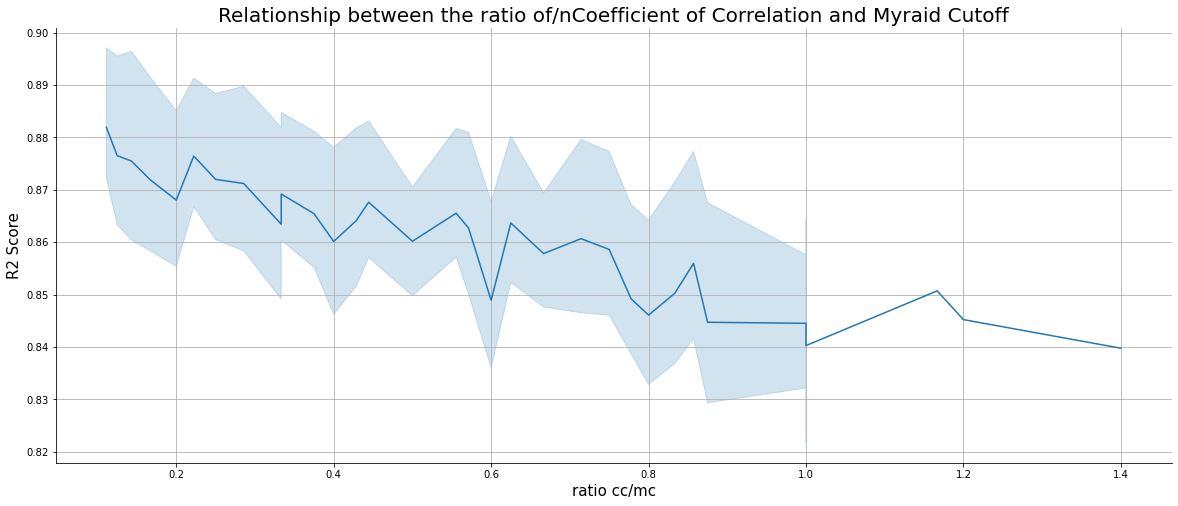

In [100]:
# Plot
plt.figure(figsize=(20,8))    

sns.lineplot(data=results.sort_values(by='R2', ascending=False).head(100), x='ratio cc/mc', y='R2')
plt.title('Relationship between the ratio of/nCoefficient of Correlation and Myraid Cutoff', fontsize=20)
plt.xlabel('ratio cc/mc', fontsize=15)
plt.ylabel('R2 Score', fontsize=15)

sns.despine()
plt.grid()

- So there is definitely a pattern behind the ratio between `Correlation Coefficient` and `Myraid Cutoff`!
    - The lower the ratio, the Higher the R2

In [101]:
# Read in the data again
data = pd.read_table('AmesHousing.tsv', delimiter="\t")

In [102]:
# Initiate an empty list
result_list_close = []

# A range of Correlation Coefficients 
for coef_cutoff in np.arange(0.01,0.20,0.01):
    # Range for Myraid Cutoff (It's about the acceptable percentage presence of the mode in the column)
    for myraid_cutoff in np.arange(0.8,1.0,0.01):
        temp_list = []
        round4_transformed_data = transform_features(data)
        round4_selected_data = select_features(round4_transformed_data, coef_cutoff, 40, myraid_cutoff)
        round4_rmse_data = train_and_test(round4_selected_data, 9)
        temp_list.append(coef_cutoff)
        temp_list.append(cardinality_thresh)
        temp_list.append(myraid_cutoff)
        temp_list.append(round4_rmse_data[0])
        temp_list.append(round4_rmse_data[1])
        result_list_close.append(temp_list)

results_close = pd.DataFrame(result_list_close, columns=['Correlation Coefficient', 'Cardinality Thresh',
                                           'Myraid Cutoff', 'RMSE', 'R2'])
results_close

,Correlation Coefficient,Cardinality Thresh,Myraid Cutoff,RMSE,R2
0,0.0100,30,0.8000,25319.5955,0.8931
1,0.0100,30,0.8100,25390.3321,0.8941
2,0.0100,30,0.8200,25403.5577,0.8939
3,0.0100,30,0.8300,25531.9459,0.8953
4,0.0100,30,0.8400,25462.0606,0.8941
5,0.0100,30,0.8500,25335.8613,0.8959
6,0.0100,30,0.8600,25330.5257,0.8956
7,0.0100,30,0.8700,25199.4548,0.8945
8,0.0100,30,0.8800,25353.6194,0.8951
9,0.0100,30,0.8900,25294.7159,0.8974


In [103]:
results_close.sort_values(by='R2', ascending=False).head(15)

,Correlation Coefficient,Cardinality Thresh,Myraid Cutoff,RMSE,R2
18,0.0100,30,0.9800,25123.3375,0.9000
14,0.0100,30,0.9400,25056.7559,0.9000
134,0.0700,30,0.9400,24996.8801,0.8997
96,0.0500,30,0.9600,25053.3417,0.8996
338,0.1700,30,0.9800,24866.0483,0.8992
178,0.0900,30,0.9800,24786.3574,0.8991
174,0.0900,30,0.9400,24964.7274,0.8991
39,0.0200,30,0.9900,25020.5700,0.8989
116,0.0600,30,0.9600,24969.0290,0.8989
159,0.0800,30,0.9900,25159.6298,0.8988


- It has definitely helped us! We have successfully hit 90% Accuracy. Lets tune the `Cardinality Thresh` to see if we can get even better

In [104]:
cardinality_thresh = np.arange(10,300,10)
c_dict = {}
for c in cardinality_thresh:
    round_transformed_data = transform_features(data)
    round_selected_data = select_features(round_transformed_data, 0.05, c, 0.94)
    round_rmse_data = train_and_test(round_selected_data,9)
    c_dict[c] = round_rmse_data[1]
card_ser = pd.Series(c_dict)

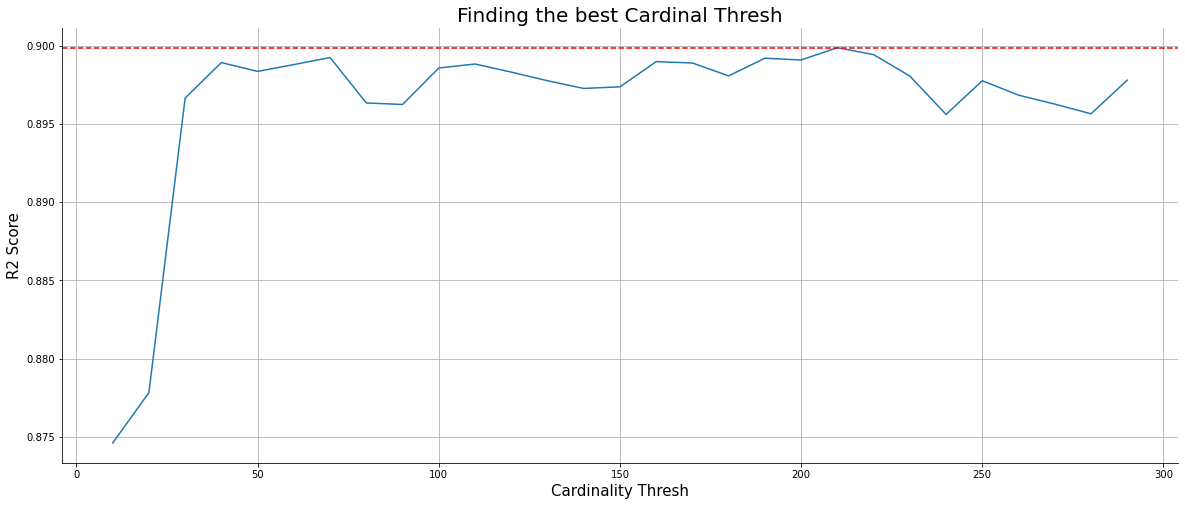

In [105]:
# Plot
plt.figure(figsize=(20,8))    

sns.lineplot(data=card_ser, x=card_ser.index, y=card_ser.values)
plt.title('Finding the best Cardinal Thresh', fontsize=20)
plt.xlabel('Cardinality Thresh', fontsize=15)
plt.ylabel('R2 Score', fontsize=15)

plt.axhline(card_ser.values.max(), color='red', linestyle='--')
sns.despine()
plt.grid()

- The optimum value of `Cardinality Thresh` can be close to 100

In [126]:
# We updated transform_features()
round_transformed_data = transform_features(data)
round_selected_data = select_features(round_transformed_data, 0.05, 213, 0.94)
round_rmse_data = train_and_test(round_selected_data,9)
print(round_rmse_data)

(24880.337336146637, 0.8995203769925438)


#### Finally, lets check our results over a range of CV folds

In [127]:
folds_dict = {}
folds = np.arange(3,100)
for cv in folds:
    round_transformed_data = transform_features(data)
    round_selected_data = select_features(round_transformed_data, 0.05, 213, 0.94)
    round_rmse_data = train_and_test(round_selected_data, cv)
    folds_dict[cv] = round_rmse_data[0]

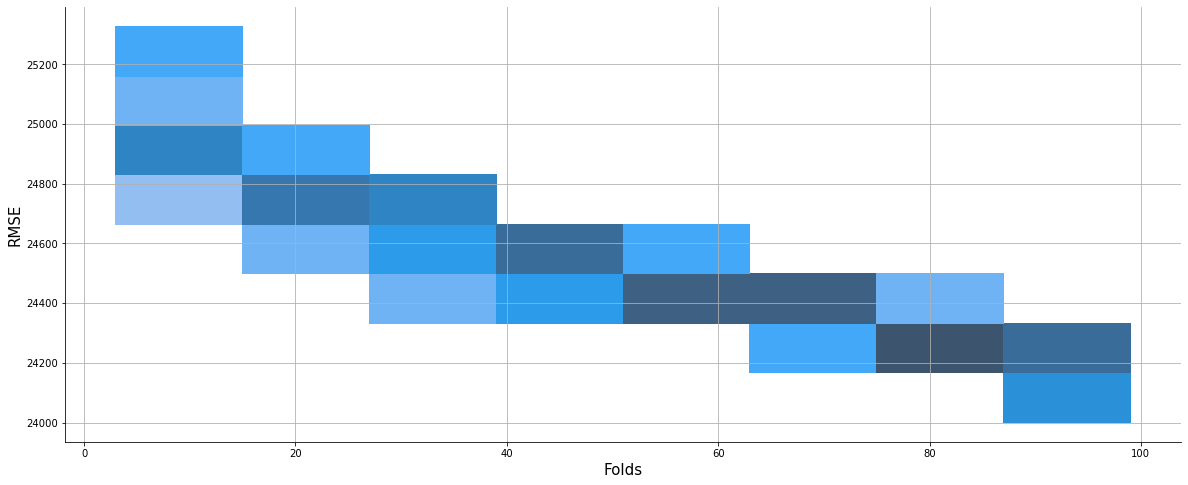

In [128]:
folds_ser = pd.Series(folds_dict)
# Plot
plt.figure(figsize=(20,8))    

sns.histplot(data=folds_ser, x=folds_ser.index, y=folds_ser.values)
plt.xlabel('Folds', fontsize=15)
plt.ylabel('RMSE', fontsize=15)

sns.despine()
plt.grid()

- Lowest RMSE (Highest R2) scores are can be found with the increasing number of folds.

In [163]:
# We updated transform_features()
round_transformed_data = transform_features(data)
round_selected_data = select_features(round_transformed_data, 0.05, 214, 0.94)
round_rmse_data = train_and_test(round_selected_data,9)
print(round_rmse_data)

(24743.20299773431, 0.8969196329782585)


- Its still a bit unclear that what number of K-Folds would be the best. There are very minute differences among the results from different numbers of folds

---

## Conclusions:

- Outliers such as where `SalePrice` is above than USD 700,000 or even USD 600,000 could be ousted but I kept them
- Multple threshs to control the Features were introduced, hence Scaling and using Regularization is still left. 
- Overall, we are able to attain **R2 of 90%** and an **RMSE of 24740** 


It is yet to see as well that how this data would respond to Ridge, and Lasso, where we will be having quite a few parameters to optmize with. 
